In [1]:
import numpy as np
import matplotlib.pyplot as plt

from mpl_toolkits.mplot3d import Axes3D

# Read data from lab1-1

In [2]:
acc = np.load('data.npy')

# Zero mean

In [3]:
z_mean = acc - np.mean(acc)
z_mean.shape

(263, 3)

# Covariance

In [4]:
cov_mat = np.dot(z_mean.T, z_mean) / (z_mean.shape[0] -1)
cov_mat

array([[27.36740489, -2.68419494,  2.84597962],
       [-2.68419494, 46.38712361, -9.43172126],
       [ 2.84597962, -9.43172126, 31.9864659 ]])

# Eigenspace

In [5]:
eig_val, eig_vec = np.linalg.eig(cov_mat)
eig_val, eig_vec

(array([51.60948759, 25.69670257, 28.43480424]),
 array([[-0.15005263,  0.76184023,  0.63014576],
        [ 0.88241898, -0.18425171,  0.43288342],
        [-0.44589344, -0.62100787,  0.64461482]]))

# Sort

(array([51.60948759, 28.43480424, 25.69670257]),
 array([[-0.15005263,  0.76184023,  0.63014576],
        [-0.44589344, -0.62100787,  0.64461482],
        [ 0.88241898, -0.18425171,  0.43288342]]))

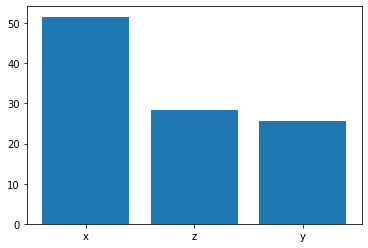

In [6]:
sort_index = np.argsort(eig_val)[::-1]
eig_val = eig_val[sort_index]
eig_vec = eig_vec[sort_index]

xtrick = ['xyz'[i] for i in sort_index]
plt.xticks(np.arange(eig_val.shape[0]), xtrick)
plt.bar(np.arange(eig_val.shape[0]), eig_val)

eig_val, eig_vec

In [7]:
eig_vec = ( eig_vec.T * np.sqrt(eig_val) ).T
eig_vec

array([[-1.07797422,  5.47304067,  4.52695096],
       [-2.3776953 , -3.31148067,  3.43736309],
       [ 4.47315079, -0.9340072 ,  2.19436895]])

In [8]:
scale = 2
ev = eig_vec.T * scale
ev

array([[-2.15594845, -4.75539061,  8.94630159],
       [10.94608134, -6.62296135, -1.8680144 ],
       [ 9.05390192,  6.87472618,  4.3887379 ]])

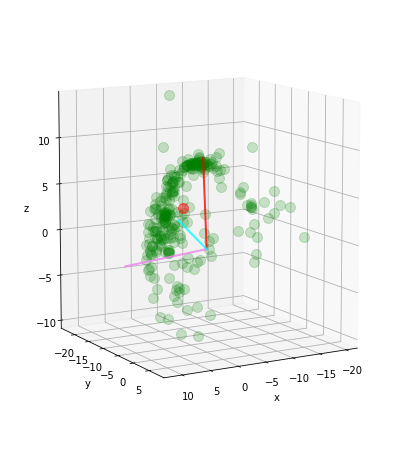

In [9]:
figsize = (32, 8)
fig = plt.figure(figsize=figsize)

ax = fig.add_subplot(1, 4, 1, projection='3d')
ax.plot(z_mean[:, 0], z_mean[:, 1], z_mean[:, 2], 'o', markersize=10, color='g', alpha=0.2)
ax.plot([acc[:, 0].mean()], [acc[:, 1].mean()], [acc[:, 2].mean()], 'o', markersize=10, color='r', alpha=0.5)

ax.plot([0, ev[0][0]], [0, ev[0][1]], [0, ev[0][2]], color='red', alpha=0.8, lw=2)
ax.plot([0, ev[1][0]], [0, ev[1][1]], [0, ev[1][2]], color='violet', alpha=0.8, lw=2)
ax.plot([0, ev[2][0]], [0, ev[2][1]], [0, ev[2][2]], color='cyan', alpha=0.8, lw=2)

ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.view_init(10, 60)

# Encode

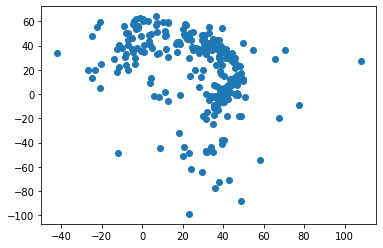

In [10]:
k = [0, 1]
pca = np.dot(acc, eig_vec[:, k])
plt.scatter(pca[:, 0], pca[:, 1])